<a href="https://colab.research.google.com/github/sunggookang/2022python_chick/blob/main/5%EC%A3%BC%EC%B0%A8_%EB%AF%B8%EC%85%98(%EA%B0%90%EC%9E%90%EB%8F%84%EB%A6%AC).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#5주차 미션(감자도리)
##감기 예보 & 기온과 감기 환자 수의 관계
1. 시도별감기 발생 데이터, 기온 데이터 가져오기
2. x리스트에 시도별감기 발생 데이터 넣기 -> 일별 감기 환자 수 boxplot으로 나타내기
3. x2리스트에 기온 데이터 넣기 -> 일별 평균 기온 boxplot으로 나타내기
4. 일별 감기 환자수 -> 월별 평균 환자 수 구하기
5. 일별 평균 기온 -> 월별 평균 기온 구하기
6. scatter로 기온과 감기 환자 수의 관계 나타내기

In [1]:
from google.colab import files
files.upload()

Saving 시도별감기발생.csv to 시도별감기발생 (1).csv


{'시도별감기발생.csv': b'\xb3\xaf\xc2\xa5,\xbd\xc3\xb5\xb5\xc1\xf6\xbf\xaa\xc4\xda\xb5\xe5,\xb9\xdf\xbb\xfd\xb0\xc7\xbc\xf6(\xb0\xc7)\r\n20140101,11,5992\r\n20140101,26,3158\r\n20140101,27,2190\r\n20140101,28,3426\r\n20140101,29,2635\r\n20140101,30,2861\r\n20140101,31,1381\r\n20140101,41,13646\r\n20140101,42,1101\r\n20140101,43,2322\r\n20140101,44,2993\r\n20140101,45,4076\r\n20140101,46,4657\r\n20140101,47,2574\r\n20140101,48,4107\r\n20140101,49,1506\r\n20140101,99,58653\r\n20140102,11,101309\r\n20140102,26,42779\r\n20140102,27,26764\r\n20140102,28,30532\r\n20140102,29,16256\r\n20140102,30,16587\r\n20140102,31,14698\r\n20140102,41,132576\r\n20140102,42,13424\r\n20140102,43,15083\r\n20140102,44,24382\r\n20140102,45,26312\r\n20140102,46,22508\r\n20140102,47,28448\r\n20140102,48,38446\r\n20140102,49,6458\r\n20140102,99,556796\r\n20140103,11,84210\r\n20140103,26,34625\r\n20140103,27,21412\r\n20140103,28,24679\r\n20140103,29,13442\r\n20140103,30,13881\r\n20140103,31,11461\r\n20140103,41,108773\r\n

In [ ]:
from google.colab import files
files.upload()

In [6]:
ls

'시도별감기발생 (1).csv'   sample_data/          suwon_temp.csv
 시도별감기발생.csv       'suwon_temp (1).csv'


In [ ]:
!apt-getinstall fonts-nanum -q > /dev/nanums!
!fc-cache -fv
import matplotlib as mpl
mpl.font_manager._rebuild()
findfont = mpl.font_manager.fontManager.findfont
mpl.font_manager.findfont = findfont
mpl.backends.backend_agg.findfont = findfont 

[48235.6380455408, 46171.20458094742, 45724.34629981025, 48874.404656862745, 40979.01944971537, 32412.659803921568, 29262.718080780698, 27315.91190024397, 40991.38319327731, 44819.495256166985, 53549.59691876751, 58901.44700460829]
[-2.947129579004921, -0.6542291541691662, 4.821268452706397, 11.543898305084745, 17.11957353745216, 21.638022598870055, 24.953702687877126, 25.569744160177976, 20.680287356321838, 13.840767519466073, 6.495, -0.4804226918798665]


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


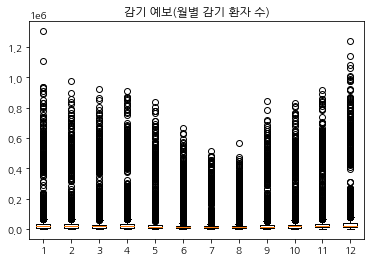

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


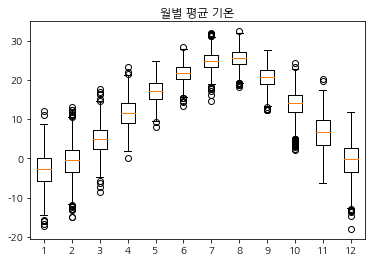

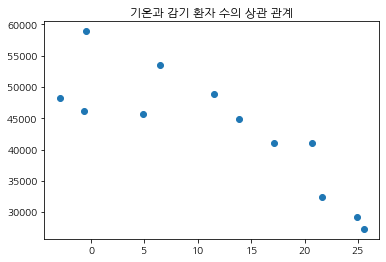

In [21]:
import csv, statistics
data = csv.reader(open('시도별감기발생.csv', encoding='cp949'))
temp = csv.reader(open('suwon_temp.csv', encoding = 'cp949'))

next(data)
next(temp)

x=[]
x2=[]

#리스트x에 12개 빈 원소(리스트) 만들기
for i in range(12) :
  x.append([])
  x2.append([])

for row in data :
  #리스트x 12개 빈 원소(리스트)에 일별 감기 발생 건수 추가하기
  x[int(row[0][4:6])-1].append(int(row[-1]))

for row2 in temp :
  if row2[2] != '' :
    #리스트x2 12개 빈 원소(리스트)에 일별 평균 기온 데이터 추가하기
    x2[int(row2[0].split('-')[1]) - 1].append(float(row2[2]))

#일별 감기 환자수 -> 월별 평균 환자 수 구하기
aver_x = [statistics.mean(i) for i in x]
#일별 평균 기온 -> 월별 평균 기온 구하기
aver_x2 = [statistics.mean(j) for j in x2]
  
print(aver_x)
print(aver_x2)

import matplotlib.pyplot as plt
plt.rc('font', family = 'NanumGothic')
plt.rcParams['axes.unicode_minus'] = False
plt.title('감기 예보(월별 감기 환자 수)')
plt.boxplot(x)
plt.show()

plt.title('월별 평균 기온')
plt.boxplot(x2)
plt.show()

plt.title('기온과 감기 환자 수의 상관 관계')
plt.scatter(aver_x2, aver_x)
plt.show()


#<해석>
##기온이 떨어질수록 감기 환자 수가 진짜! 늘어난다!
###(기온과 감기 환자 수는 음의 상관관계가 있다.) 

###1) 제 프로젝트의 주제 : 감기 예보 & 기온과 감기 환자 수의 관계
###2) 프로젝트 코랩 링크 : https://colab.research.google.com/drive/1cEBS2yYFw4KjlAqlEZMjJS18LDsYvZMx?usp=sharing
###3) 깃헙 링크 : https://github.com/sunggookang/2022python_chick